<a href="https://colab.research.google.com/github/Serlopez149/Python/blob/main/prueba_tecnica_Sergio_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba tecnica Sergio Lopez



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

%matplotlib inline

In [ ]:
titatic_train = pd.read_csv("/content/drive/MyDrive/prueba_tecnica/train_titanic (1) (1).csv")
titatic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


variables objetiuvos

Cantidad de valores nulos

In [ ]:
titatic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Limpieza de datos

**problemas con la caracteristica edad**


*     Conseguir el promedio de las edades para remplazarlos por por los valor nulos existentes en la tabla.

In [ ]:
titatic_train['Age'].mean()

29.69911764705882

Se puede visualizar que el promedio de las edades, es de 30 años, por ende procedere en incluirlo en los valores nulos, buscando aprovechar todos los valores de la tabla

In [ ]:
promedio = 30
titatic_train['Age'] = titatic_train['Age'].replace(np.nan, promedio)

# **Eliminar caracteristicas innecesarias**

 


*   Nombre
*   Ticket
*   Pasaje
*   Cabina --> muchos valores NaN


elimino estas caracteristicas de la tabla ya que no las considero importantes para hacer la prediccion


In [ ]:
titatic_train.drop([ 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)


In [ ]:
titatic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


#Convertir string a valores numericos

para despues hacer mejor los analisis de prediccion con la libreria de Sklearn

In [ ]:
titatic_train['Sex'].replace(['male', 'female'],[0,1], inplace = True)
titatic_train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)

In [ ]:
titatic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0.0
1,2,1,1,1,38.0,1,0,1.0
2,3,1,3,1,26.0,0,0,0.0
3,4,1,1,1,35.0,1,0,0.0
4,5,0,3,0,35.0,0,0,0.0


In [ ]:
titatic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

#tratamiento de datos nulos

Verificando los datos nulos en la columna de embarque podemos ver que solo hay dos datos nulos, vamos a buscar cuales son los sitios donde mas embarcaron los pasajeros para asi suplantarlos por el dato que mas se repite.  

In [ ]:
titatic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [ ]:
titatic_train[titatic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,62,1,1,1,38.0,0,0,NaN
829,830,1,1,1,62.0,0,0,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numero de pasajeros que abordaron')

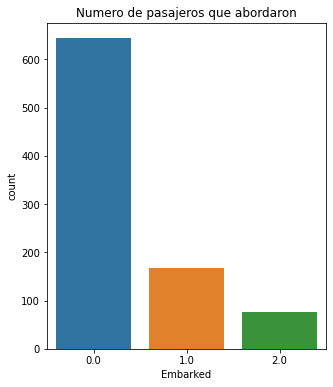

In [ ]:
f, ax = plt.subplots(1, 1,figsize=(5, 6))

sns.countplot('Embarked', data = titatic_train, ax= ax)
ax.set_title('Numero de pasajeros que abordaron')

Agregamos esos dos valores nulos, a la puerta de embarque 0 ya que la mayoria de los pasajeros entraron por esa puerta.

In [ ]:
titatic_train['Embarked'].fillna(0, inplace=True)

In [ ]:
titatic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Separamos los rangos de edad en 4, para poder revisar que ragos de edad tienen mas probabilidades de sobrevivir.

In [ ]:
titatic_train['rango_de_edad'] = 0
titatic_train.loc[titatic_train['Age'] <= 16, 'rango_de_edad'] = 0
titatic_train.loc[(titatic_train['Age'] >16) & (titatic_train['Age']<=32), 'rango_de_edad']= 1
titatic_train.loc[(titatic_train['Age'] >32) & (titatic_train['Age']<=48), 'rango_de_edad']= 2
titatic_train.loc[(titatic_train['Age'] >48) & (titatic_train['Age']<=64), 'rango_de_edad']= 3
titatic_train.loc[titatic_train['Age'] >64 , 'rango_de_edad']= 4

In [ ]:
titatic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,rango_de_edad
0,1,0,3,0,22.0,1,0,0.0,1
1,2,1,1,1,38.0,1,0,1.0,2
2,3,1,3,1,26.0,0,0,0.0,1
3,4,1,1,1,35.0,1,0,0.0,2
4,5,0,3,0,35.0,0,0,0.0,2


In [ ]:
titatic_train['rango_de_edad'].value_counts().to_frame()

,rango_de_edad
1,523
2,188
0,100
3,69
4,11


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


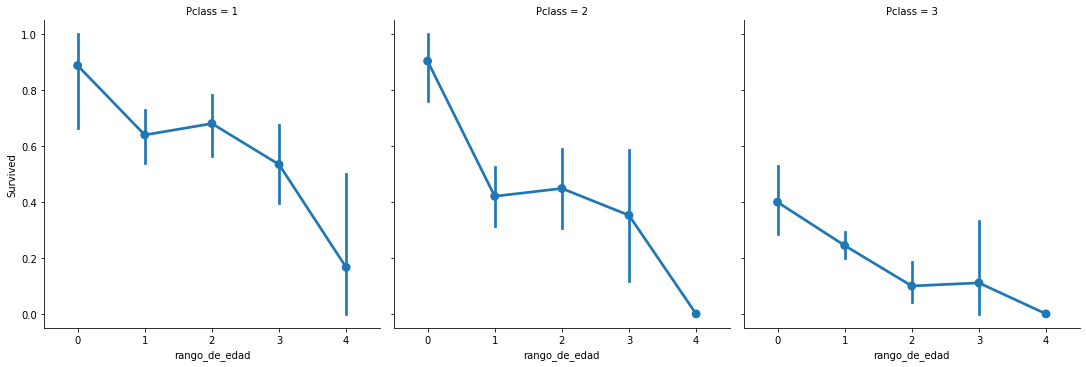

In [ ]:
sns.factorplot('rango_de_edad', 'Survived', data=titatic_train, col = 'Pclass')

Evaluamos los porcentajes de sobrevivientes del naufragio, para luego poder analizarlo por la cantidad de mujeres y hombres que sobreviven.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cantidad de sobrevivientes')

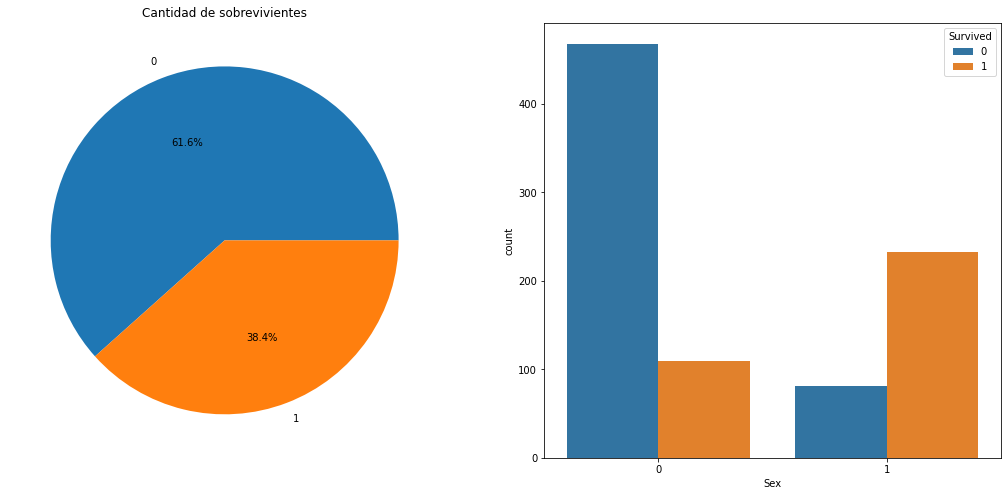

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

titatic_train['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('sobreviviente')
ax[0].set_ylabel('')

sns.countplot('Sex', hue='Survived', data= titatic_train, ax= ax[1])
ax[0].set_title('Cantidad de sobrevivientes')

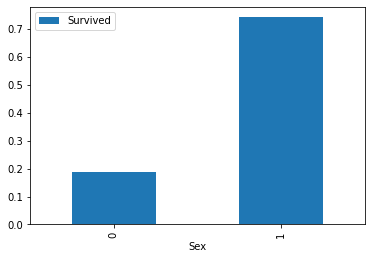

In [ ]:
titatic_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

In [ ]:
pd.crosstab( titatic_train['Pclass'], titatic_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Clase')

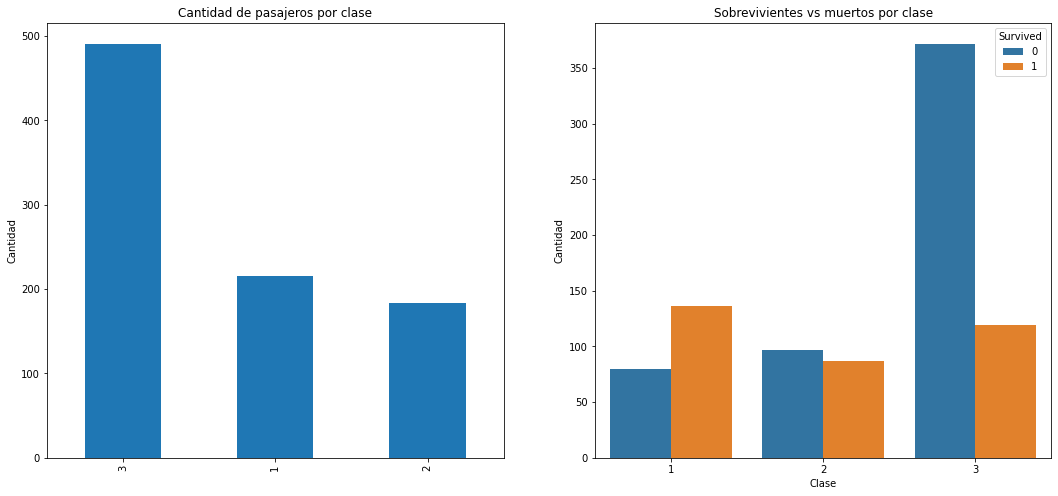

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
titatic_train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Cantidad de pasajeros por clase")
ax[0].set_ylabel('Cantidad')

sns.countplot('Pclass', hue='Survived', data=titatic_train, ax=ax[1])
ax[1].set_title('Sobrevivientes vs muertos por clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clase')

##Analizando la tasa de supervivencia segun sexo y clase

y con esto tomar dos factores, el primero la de ser mujer y tener mayor probabilidad de sobrevivir respecto a su clase, y la de ser hombre con la misma variable en consideracion.

In [ ]:
pd.crosstab([titatic_train['Sex'], titatic_train['Survived']], titatic_train['Pclass'], margins=True)

Pclass          1    2    3  All
Sex Survived                    
0   0          77   91  300  468
    1          45   17   47  109
1   0           3    6   72   81
    1          91   70   72  233
All           216  184  491  891

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


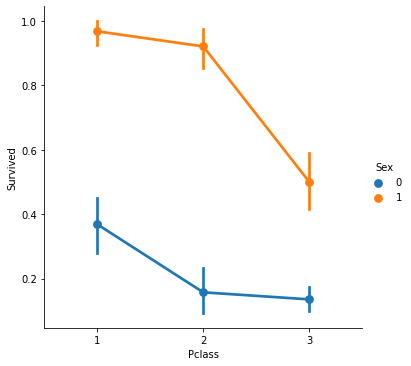

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data= titatic_train)
plt.show()

# Implementacion de la libreria de sklearn para hacer los algoritmos de prediccion.

In [ ]:
X = np.array(titatic_train.drop(['Survived'], 1))
y = np.array(titatic_train['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#regresion logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print(f"presicion Regresion Logistica {logreg.score(X_train, y_train)}")


#Precision de soporte de vectores 
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print(f'precision de soporte de Vectores: {svc.score(X_train, y_train)}')


#Precision Vecinos mas cercanos 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print(f'Precision Vecinos mas cercanos: {knn.score(X_train, y_train)}')


presicion Regresion Logistica 0.8047752808988764
precision de soporte de Vectores: 0.6292134831460674
Precision Vecinos mas cercanos: 0.7528089887640449


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#prediccion en base a los modelos realizados

In [ ]:
#Regresion logistica
ids =titatic_train['PassengerId']

prediccion_logreg = logreg.predict(titatic_train.drop('PassengerId',axis=1))
out_logreg = pd.DataFrame({'PassengerId': ids, 'survived': prediccion_logreg})
print(f"""prediccion de Regresion Logistica
        
        {out_logreg.head()}""")

prediccion de Regresion Logistica
        
           PassengerId  survived
0            1         0
1            2         1
2            3         1
3            4         1
4            5         0


In [ ]:
#Soporte de Vectores

prediccion_svc = svc.predict(titatic_train.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({'PassengerId': ids, 'survived': prediccion_svc})
print(f"""prediccion de soporte de vectores
        
        {out_svc.head()}""")

prediccion de soporte de vectores
        
           PassengerId  survived
0            1         0
1            2         0
2            3         0
3            4         0
4            5         0


In [ ]:
#Prediccion de Vecinos mas cercanos Knn

prediccion_knn = knn.predict(titatic_train.drop('PassengerId', axis=1))
out_knn = pd.DataFrame({'PassengerId': ids, 'survived': prediccion_knn})
print(f"""prediccion de soporte de vectores
        
        {out_knn.head()}""")

prediccion de soporte de vectores
        
           PassengerId  survived
0            1         1
1            2         1
2            3         1
3            4         1
4            5         1
